In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [8]:
df=pd.read_csv("Churn_Modelling.csv")
df               

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [9]:
df=df.drop(columns=['RowNumber','CustomerId','Surname'])
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [10]:
df['Geography']=df['Geography'].astype('category')
df['Geography']=df['Geography'].cat.codes

df['Gender']=df['Gender'].astype('category')
df['Gender']=df['Gender'].cat.codes
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [11]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [12]:
x=df.drop(columns='Exited')
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64
9996,516,0,1,35,10,57369.61,1,1,1,101699.77
9997,709,0,0,36,7,0.00,1,0,1,42085.58
9998,772,1,1,42,3,75075.31,2,1,0,92888.52


In [13]:
y=df['Exited']

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [16]:
x_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
2228,644,0,0,37,8,0.00,2,1,0,20968.88
5910,481,0,0,39,6,0.00,1,1,1,24677.54
1950,680,0,0,37,10,123806.28,1,1,0,81776.84
2119,690,0,1,29,5,0.00,2,1,0,108577.97
5947,656,0,0,45,7,145933.27,1,1,1,199392.14
...,...,...,...,...,...,...,...,...,...,...
2895,621,1,1,47,7,107363.29,1,1,1,66799.28
7813,684,1,0,63,3,81245.79,1,1,0,69643.31
905,672,0,0,45,9,0.00,1,1,1,92027.69
5192,663,0,0,39,8,0.00,2,1,1,101168.90


In [17]:
x_test

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
9953,550,0,1,47,2,0.00,2,1,1,97057.28
3850,680,0,1,34,3,143292.95,1,1,0,66526.01
4962,531,0,0,42,2,0.00,2,0,1,90537.47
3886,710,1,1,34,8,147833.30,2,0,1,1561.58
5437,543,1,1,30,6,73481.05,1,1,1,176692.65
...,...,...,...,...,...,...,...,...,...,...
5273,529,0,1,32,9,147493.89,1,1,0,33656.35
8014,731,2,0,39,2,126816.18,1,1,1,74850.93
8984,645,0,1,25,0,174400.36,1,1,0,42669.37
6498,613,0,0,27,5,125167.74,1,1,0,199104.52


In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler=StandardScaler()

In [20]:
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [21]:
x_train_scaled

array([[-0.06042858, -0.90542304, -1.08628092, ...,  0.64198477,
        -1.01903834, -1.37686713],
       [-1.74363086, -0.90542304, -1.08628092, ...,  0.64198477,
         0.98131735, -1.31233857],
       [ 0.31132161, -0.90542304, -1.08628092, ...,  0.64198477,
        -1.01903834, -0.31884349],
       ...,
       [ 0.22871046, -0.90542304, -1.08628092, ...,  0.64198477,
         0.98131735, -0.14048457],
       [ 0.13577291, -0.90542304, -1.08628092, ...,  0.64198477,
         0.98131735,  0.01856724],
       [ 1.16841234,  0.30503557,  0.92057219, ...,  0.64198477,
        -1.01903834, -1.15947765]])

In [22]:
x_test_scaled

array([[-1.03110965, -0.90542304,  0.92057219, ...,  0.64198477,
         0.98131735, -0.05297259],
       [ 0.31132161, -0.90542304,  0.92057219, ...,  0.64198477,
        -1.01903834, -0.58419919],
       [-1.22731114, -0.90542304, -1.08628092, ..., -1.55766936,
         0.98131735, -0.16641355],
       ...,
       [-0.05010219, -0.90542304,  0.92057219, ...,  0.64198477,
        -1.01903834, -0.99929104],
       [-0.38054681, -0.90542304, -1.08628092, ...,  0.64198477,
        -1.01903834,  1.72259088],
       [ 0.17707849,  1.51549418, -1.08628092, ...,  0.64198477,
         0.98131735,  1.50922501]])

In [23]:
model=keras.Sequential([keras.layers.Dense(5,input_shape=(10,),activation='relu'),
                        keras.layers.Dense(1,activation='sigmoid')
                       ])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics='accuracy')
model.fit(x_train_scaled,y_train,epochs=100)

Epoch 1/100
219/219 [==============================] - 2s 3ms/step - loss: 0.7826 - accuracy: 0.5259
Epoch 2/100
219/219 [==============================] - 1s 3ms/step - loss: 0.5460 - accuracy: 0.7447
Epoch 3/100
219/219 [==============================] - 1s 4ms/step - loss: 0.4820 - accuracy: 0.7961
Epoch 4/100
219/219 [==============================] - 1s 3ms/step - loss: 0.4567 - accuracy: 0.7990
Epoch 5/100
219/219 [==============================] - 1s 3ms/step - loss: 0.4437 - accuracy: 0.8001
Epoch 6/100
219/219 [==============================] - 1s 3ms/step - loss: 0.4359 - accuracy: 0.8037
Epoch 7/100
219/219 [==============================] - 1s 3ms/step - loss: 0.4303 - accuracy: 0.8097
Epoch 8/100
219/219 [==============================] - 1s 3ms/step - loss: 0.4250 - accuracy: 0.8131
Epoch 9/100
219/219 [==============================] - 1s 3ms/step - loss: 0.4196 - accuracy: 0.8174
Epoch 10/100
219/219 [==============================] - 1s 3ms/step - loss: 0.4135 - accura

In [24]:
model.evaluate(x_test_scaled,y_test)

94/94 [==============================] - 1s 3ms/step - loss: 0.3517 - accuracy: 0.8580


[0.3517377972602844, 0.8579999804496765]

In [26]:
y_predicted=model.predict(x_test_scaled)
y_predicted[10:20]

94/94 [==============================] - 0s 3ms/step


array([[0.16329779],
       [0.15409909],
       [0.08827616],
       [0.04066875],
       [0.20185407],
       [0.03296121],
       [0.01035421],
       [0.14879707],
       [0.04650506],
       [0.3243987 ]], dtype=float32)

In [27]:
y_test[10:20]

8418    0
2418    1
6811    0
1217    0
6978    0
6111    0
7865    0
7781    0
7775    0
7039    0
Name: Exited, dtype: int64

In [30]:
y_pred=[]
for value in y_predicted:
    if value>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [31]:
y_pred[10:20]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [33]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2373
           1       0.80      0.43      0.56       627

    accuracy                           0.86      3000
   macro avg       0.83      0.70      0.74      3000
weighted avg       0.85      0.86      0.84      3000



In [42]:
cm=tf.math.confusion_matrix(y_test,y_pred)
cm

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[2307,   66],
       [ 360,  267]])>

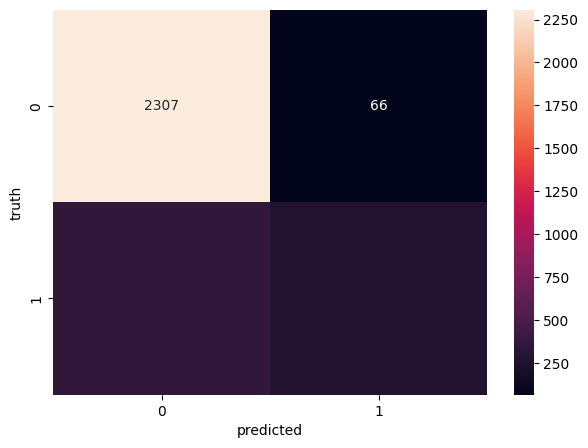

In [46]:
cm=tf.math.confusion_matrix(y_test,y_pred)
plt.figure(figsize=(7,5))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('truth')
plt.show()